# 5  | Lab session | Team coding: Height Challenge
**ES143 Computer Vision, Harvard University, Spring 2024**

**Due at the end of lab session (Feb. 29 & Mar. 1)**

Name: *(<font color=red>name of your group members</font>)*

<br>

---

*When you are done solving this assignment, submit your `.zip` and `.html` files to the appropriate assignment on Canvas. Instructions for generating and naming the `.html` and the `.zip` files are [at the bottom of this notebook](#submission).*

---
<br>

In this team coding task you will learn to:
* Use cross products (via `np.cross()`) to compute joins, intersections, vanishing points and vansihing lines
* Implement Algorithm 8.1 from Hartley & Zisserman (p222) to compute relative heights

To maximize your learning, you and your teamate(s) must each create and submit your own notebooks. However, this task is an open collaboration between you and your teamate(s), so it is encouraged for you to work together, for example by dividing up tasks, sharing snippets of code with each other, and helping each other with strategy and debugging.

As usual, use of generative AI tools must adhere to the course policy as described in the [ES 143 Syllabus](https://canvas.harvard.edu/courses/129415/assignments/syllabus). In particular:
* You may not submit AI-generated code that you cannot explain, or whose validity and correctness you have not verified.
* Your use of generative AI tools must be documented in [this text cell](#ai-disclosure) at the bottom of the notebook.

### Getting started

The input image and data file referenced in this assignment to complete the assignment can be found in the `.zip` that accompanies this notebook on Canvas. If you have not already done so, begin by creating copies of the notebook and the `.zip` file in your google drive. The filepaths for this assignment should be

`My Drive/es-143-assignments/L05/5_HeightChallenge.{ipynb,zip}`

It is important that the `.zip` file is in the same folder as the notebook before you run the first cell below,

### When you are done

1. Make sure that your main code cell executes and outputs your best answer in the form of a string like "*Dr. Xiong is XX.X inches tall*"
2. Have each team member submit their `.html` and `.zip` in Canvas. Filenames should be of the form
`LASTNAME1_LASTNAME2_L05-HeightChallenge.{html,zip}`.

# Setup

In [1]:
# Import required libraries here
import cv2           # OpenCV
import numpy as np   # numpy
import os            # for file handling
import pickle        # for data files

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 15]

In [ ]:
# Mount your google drive. This will launch a pop-up window for authentication.

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# YOU SHOULD HAVE ALREADY COPIED OVER THE ASSIGNMENT FILES TO A FOLDER
# TITLED "~/es-143-assignments/L05/" ON YOUR GOOGLE DRIVE

# %cd "/content/drive/My Drive/es-143-assignments/L05/"

/content/drive/My Drive/es-143-assignments/L05


In [2]:
! unzip -n 5_HeightChallenge.zip

Archive:  5_HeightChallenge.zip
   creating: data/
  inflating: data/xiong.jpg          
  inflating: data/xiongpts.pickle    
  inflating: data/xiong_pts_plot.png  


# Demonstration

This assignment's `./data` folder contains the image file `xiong.jpg` and a corresponding `.pickle` file of 2D point coordinates. The next cell shows how to load the point coordinates and display them on the image. It also defines some helper functions for computing Euclidean distances between points and for plotting lines in the image. Finally, it defines two height values (`HANDRAIL` or `TALLBRICK`) that were collected using a tape measure in the 3D scene; you will need to use at least one of these values as described in HZ Section 8.1.

(For reference, the `./data` folder also contains the file `xiong_pts_plot.jpg` which is a copy of the point visualization.)

---

<font color='red'>**To do**</font>: Run the cell and observe the output. Then read the code carefully and make sure you understand it. This understanding is critical for your task.

Distance between points 17 and 21 is 691.0 pixels


1

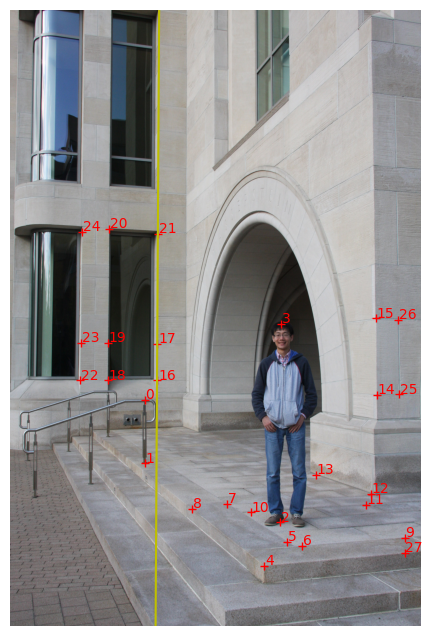

In [3]:
# Some vertical measurements that were made in the 3D scene (in inches)
HANDRAIL=36   # between datapoints 0 and 1
TALLBRICK=33  # between datapoints 14 and 15, which is the same as between datapoints 16 and 17

# helper: plot line in given axes
def plotimageline(ax,h,w,l,col):
    #  ax: axes object
    #  h,w: height and width of image
    #  l: line as homogeneous three-vector
    #  col: color string to be passed to ax.plot(), e.g. 'r'

    assert l.size==3,'unexpected line shape'
    assert l[1]!=0,'exactly-vertical lines are not supported'

    # intersections of line with image boundary
    x_ext = np.array([0, w - 1])
    y_ext = -(l[0] * x_ext + l[2]) / l[1]

    # draw
    ax.plot(x_ext, y_ext,col)
    return 1

# helper: Euclidean distance between two homogeneous vectors
def imdist(x1,x2):

    assert x1.size==3,'unexpected point shape'
    assert x2.size==3,'unexpected point shape'

    x1i=x1[0:2]/x1[2]
    x2i=x2[0:2]/x2[2]
    d=np.sqrt(np.sum(np.square(x1i-x2i)))
    return d

# load image
assert os.path.exists('./data/xiong.jpg'), 'Upload xiong.jpg and then re-run cell'
img = cv2.imread('./data/xiong.jpg')

# load point coordinates
assert os.path.exists('./data/xiongpts.pickle'), 'Upload xiongpts.pickle and then re-run cell'
pts=pickle.load(open('./data/xiongpts.pickle', 'rb'))
x=pts['x']
y=pts['y']

# image dimensions
h, w = img.shape[:2]

# for convenience, homogenize all points (dtype float)
X=np.concatenate((x[:,np.newaxis],y[:,np.newaxis],np.ones((x.size,1))), axis=1)

# display image with data points
plt.rcParams['figure.figsize'] = [6, 8]
fig, ax = plt.subplots()
plt.xlim([0, img.shape[1] - 1])
plt.ylim([img.shape[0] - 1, 0])
ax.imshow(img[:, :, ::-1])
ax.axis('off')
ax.plot(x, y, 'r+')
for i,txt in enumerate(np.arange(x.size)):
    ax.annotate(txt,(x[i]+5, y[i]-5),color='red',size=10)

# examples of how to use helper functions
#  (delete this part from your submission)
d17_21 = imdist(X[17,:],X[21,:])
print("Distance between points 17 and 21 is {:.1f} pixels".format(d17_21))
l17_21 = np.cross(X[17,:],X[21,:])
plotimageline(ax,h,w,l17_21,'y')


# Your Task

Write code in the next cell to implement HZ Algorithm 8.1 and compute the height of Dr. Yong Xiong. Your code should output a plot of the image similar to the demonstration code above, but with the addition of a visualization of your estimated vanishing line and all estimated intermediate points (e.g., ${\bf u}$, $\tilde{\bf t}_1$) that are contained within the field of view.

Assign your final height value to variable `xiongheight` so that it prints correctly when the cell is executed.

*Advice:* Go slow to go fast. Plot the intermediate points and lines that are estimated at each step of the algorithm. Make sure the intermediate values look reasonable before moving on to the next step.




Dr. Xiong is 71.6 inches tall


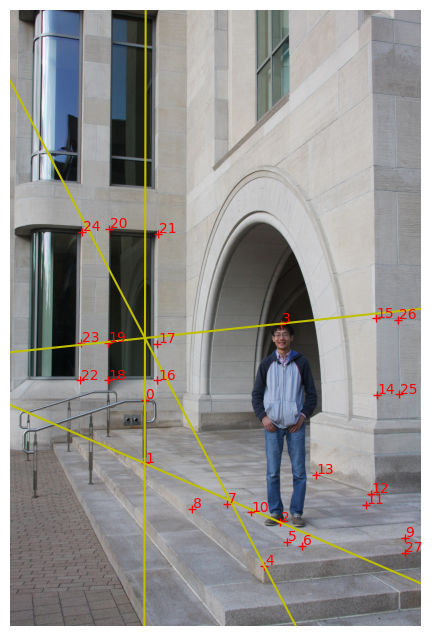

In [19]:
# TODO: insert your code here
# End by reporting Dr. Xiong's height in variable xiongheight
# display image with data points
plt.rcParams['figure.figsize'] = [6, 8]
fig, ax = plt.subplots()
plt.xlim([0, img.shape[1] - 1])
plt.ylim([img.shape[0] - 1, 0])
ax.imshow(img[:, :, ::-1])
ax.axis('off')
ax.plot(x, y, 'r+')
for i,txt in enumerate(np.arange(x.size)):
    ax.annotate(txt,(x[i]+5, y[i]-5),color='red',size=10)

# examples of how to use helper functions
#  (delete this part from your submission)
# d17_21 = imdist(X[17,:],X[21,:])
# print("Distance between points 17 and 21 is {:.1f} pixels".format(d17_21))
# l17_21 = np.cross(X[17,:],X[21,:])

lines = []
X0 = X[0,:]
X1 = X[1,:]
X2 = X[2,:]
X3 = X[3,:]
X4 = X[4,:]
X5 = X[5,:]
X6 = X[6,:]
X7 = X[7,:]
X8 = X[8,:]
X9 = X[9,:]
X27 = X[27,:]

X17 = X[17,:]
X19 = X[19,:]
X18 = X[18,:]
X16 = X[16,:]
l16_17 = np.cross(X16,X17)
l18_19 = np.cross(X18,X19)
vert_van = np.cross(l16_17,l18_19)

vert_line_to_1 = np.cross(vert_van, X1)
lines.append(vert_line_to_1)

l5_7 = np.cross(X5, X7)
l4_8 = np.cross(X4, X8)
# lines.append(l5_7)
# lines.append(l4_8)

l6_9 = np.cross(X6, X9)
l4_27 = np.cross(X4, X27)
# lines.append(l4_27)
# lines.append(l6_9)

hor_point_1 = np.cross(l4_8,l5_7)
hor_point_2 = np.cross(l4_27, l6_9)

hor_line = np.cross(hor_point_1, hor_point_2)
# lines.append(hor_line)


l1_2 = np.cross(X1, X2)
lines.append(l1_2)

feet_horizon_point = np.cross(l1_2, hor_line)

l3_feet_horizon = np.cross(feet_horizon_point, X3)
lines.append(l3_feet_horizon)
vert_line_hit_point = np.cross(l3_feet_horizon, vert_line_to_1)


for l in lines:
    plotimageline(ax,h,w,l,'y')
# plotimageline(ax,h,w,l5_7,'y')

cross_ratio = (imdist(vert_line_hit_point,X1)*imdist(vert_van, X0))/(imdist(X0, X1)*imdist(vert_van,vert_line_hit_point))



xiongheight=cross_ratio * HANDRAIL

print('Dr. Xiong is {:.1f} inches tall'.format(xiongheight))

<a name="submission"></a>
# Submission

The following cells generates an HTML export of your notebook and an accompanying ZIP file that inlcudes your `.ipynb` notebook.

`.submit/LASTNAME1_LASTNAME2_L05-HeightChallenge.{html,zip}`

Once they are generated, submit your `.html` and `.zip` files to the appropriate assignment on Canvas.

**Important**: Remember to edit the filenames (either in the cells below or on your local computer after downloading) to match your and your teammate's name, and make sure that all cells execute properly (i.e., click Runtime -> Restart session and run all) before exporting to HTML.

In [ ]:
!mkdir "submit"

In [ ]:
# Convert to HTML. Before running this cell:
# 1. edit your name in this cell
# 2. make sure your notebook executes and is saved

!jupyter nbconvert --to html 5_HeightChallenge.ipynb --output-dir "submit" --output "LASTNAME1_LASTNAME2_L05_HeightChallenge.html"

[NbConvertApp] Converting notebook 5_HeightChallenge.ipynb to html
[NbConvertApp] Writing 1197239 bytes to submit/LASTNAME1_LASTNAME2_L05_HeightChallenge.html


In [ ]:
from zipfile import ZipFile

def writeFolder(zip, path):
  import os
  for dirpath,dirs,files in os.walk(path):
    for f in files:
      fn = os.path.join(dirpath, f)
      zip.write(fn)

def writeFile(zip, path):
  zip.write(path)

In [ ]:
# Zip the source. Don't forget to edit your name before running this cell
zipObj = ZipFile('submit/LASTNAME_FIRSTNAME_L05_HeightChallenge.zip', 'w')
writeFile(zipObj, "5_HeightChallenge.ipynb")

zipObj.close()